PCA : Principle Component Analysis เทคนิคการลดมิติเพื่อแปลงข้อมูลจากมิติสูง (หลายคุณลักษณะ) ไปสู่มิติต่ำลง

### **1.Import Library + Datasets**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA #ใช้สร้างโมเดลและลดมิติ

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/BaskinRobbins.csv')
df

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0
...,...,...,...,...,...,...,...
65,Very Berry Strawberry,200,10.0,0.4,24,21,4.0
66,Watermelon Splash,120,0.5,0.0,27,20,0.1
67,Wild ‘n Reckless,80,1.5,0.0,16,12,1.0
68,Winter White Chocolate,160,8.0,0.2,20,16,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,70.0,191.714286,61.643468,70.0,152.50,180.0,240.00,330.0
Total Fat (g),70.0,10.562857,7.947275,0.0,7.25,10.0,13.75,60.0
Trans Fat (g),70.0,0.277143,0.145633,0.0,0.20,0.3,0.40,0.5
Carbohydrates (g),70.0,22.900000,5.451100,13.0,18.00,21.0,27.00,38.0
Sugars (g),70.0,16.914286,4.497158,4.0,14.00,17.0,20.00,28.0
Protein (g),70.0,3.567143,1.679175,0.0,3.00,3.5,5.00,8.0


### **2.เลือก Features for PCA**

In [ ]:
x = df[['Carbohydrates (g)','Sugars (g)','Protein (g)']]
x.head()

,Carbohydrates (g),Sugars (g),Protein (g)
0,20,16,2.0
1,19,13,3.0
2,21,15,3.0
3,17,16,3.0
4,26,20,2.0


### **3.Standardization (การปรับสเกลข้อมูล)**

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.53584393, -0.20477091, -0.9400199 ],
       [-0.72061769, -0.87667545, -0.34018952],
       [-0.35107016, -0.42873909, -0.34018952],
       [-1.09016523, -0.20477091, -0.34018952],
       [ 0.57279868,  0.69110182, -0.9400199 ],
       [-0.90539146, -0.65270727, -0.34018952],
       [-0.35107016, -2.89238908, -0.34018952],
       [-0.35107016,  0.01919727, -0.34018952],
       [ 2.79008389, -2.22048454,  0.85947125],
       [ 0.57279868,  0.46713363,  0.25964087],
       [-0.16629639,  0.01919727, -0.34018952],
       [ 0.38802491,  0.24316545,  0.85947125],
       [ 0.01847738,  0.24316545,  0.85947125],
       [ 1.49666752,  1.36300636,  0.85947125],
       [-1.09016523, -1.10064363, -0.34018952],
       [ 1.12711998,  0.69110182,  0.85947125],
       [-0.90539146, -0.87667545, -0.34018952],
       [ 0.38802491,  0.24316545, -2.13968066],
       [-0.35107016, -0.20477091, -0.34018952],
       [ 0.38802491,  0.24316545,  0.85947125],
       [ 1.49666752,  0.69110182,  0.259

### **4.สร้างโมเดล PCA และ Fit ข้อมูล**

In [ ]:
n_components = 3 #จำนวน Principle component ที่ต้องการ
pca = PCA(n_components=n_components)
pca.fit(x_scaled) #ค้นหาทิศทางของ Principle component ที่สามารถอธิบายความแปรปรวนของข้อมูลได้

PCA(n_components=3)

### **5.อธิบายความแปรปรวนในข้อมูล (Explained Variance Ratio)**

In [ ]:
pca.explained_variance_ratio_ #แสดงสัดส่วนความแปรปรวนแต่ละ Principle component อธิยายได้ ถ้าค่าสูงแปลว่า Component นั้นสามารถเก็บข้อมูลสำคัญจากคุณลักษณะเดิมได้มาก

array([0.64055051, 0.24640567, 0.11304381])

### **6.อธิบายค่าสะสมของอัตราความแปรปรวนในข้อมูล (Explained Variance Ratio)**

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.64055051, 0.88695619, 1.        ])

### **7.Principle Component (Eigenvectors) บ่งบอกถึง "น้ำหนัก" หรือ "ความสำคัญ" ของคุณลักษณะเดิมต่อ Component นั้นๆ**

In [ ]:
pca.components_

array([[ 0.64059726,  0.59303843,  0.48779153],
       [-0.16922974, -0.51059405,  0.84300357],
       [ 0.74899696, -0.62257461, -0.22672541]])

### *8.แปลงข้อมูลสู่ Principle Component*

In [ ]:
x_pca = pca.transform(x_scaled) #แปลงข้อมูลต้นฉบับให้เป็นข้อมูลในมิติของ PCA
x_pca[:5]

array([[-0.92323091, -0.59720459, -0.0607339 ],
       [-1.14746951,  0.28279423,  0.08318502],
       [-0.6450949 , -0.00845784,  0.0811012 ],
       [-0.98573544,  0.0022622 , -0.61191567],
       [ 0.31824946, -1.24224717,  0.21188843]])

### **9.สร้าง DataFrame สำหรับ PCA**

In [ ]:
df_pca=pd.DataFrame(x_pca,columns=[f'PC{i}' for i in range(1,n_components+1)])
df_pca.head()

,PC1,PC2,PC3
0,-0.923231,-0.597205,-0.060734
1,-1.147470,0.282794,0.083185
2,-0.645095,-0.008458,0.081101
3,-0.985735,0.002262,-0.611916
4,0.318249,-1.242247,0.211888


In [ ]:
df2=pd.concat([df,df_pca],axis=1)
df2.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),PC1,PC2,PC3
0,Bananas Foster,160,8.0,0.2,20,16,2.0,-0.923231,-0.597205,-0.060734
1,Baseball Nut,160,9.0,0.2,19,13,3.0,-1.147470,0.282794,0.083185
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,-0.645095,-0.008458,0.081101
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,-0.985735,0.002262,-0.611916
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0.318249,-1.242247,0.211888


### **10.สร้างกราฟ PCA**

In [ ]:
from sklearn.cluster import KMeans

# สร้างโมเดล KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df2[["PC1","PC2","PC3"]])

# สร้างคอลัมน์ cluster
df2["cluster"] = kmeans.labels_
df2

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),PC1,PC2,PC3,cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,-0.923231,-0.597205,-0.060734,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,-1.147470,0.282794,0.083185,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,-0.645095,-0.008458,0.081101,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,-0.985735,0.002262,-0.611916,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0.318249,-1.242247,0.211888,0
...,...,...,...,...,...,...,...,...,...,...,...
65,Very Berry Strawberry,200,10.0,0.4,24,21,4.0,0.799524,-0.282747,-0.476332,1
66,Watermelon Splash,120,0.5,0.0,27,20,0.1,-0.119310,-2.234269,0.608677,0
67,Wild ‘n Reckless,80,1.5,0.0,16,12,1.0,-2.220572,-0.520360,0.079431,0
68,Winter White Chocolate,160,8.0,0.2,20,16,2.0,-0.923231,-0.597205,-0.060734,0


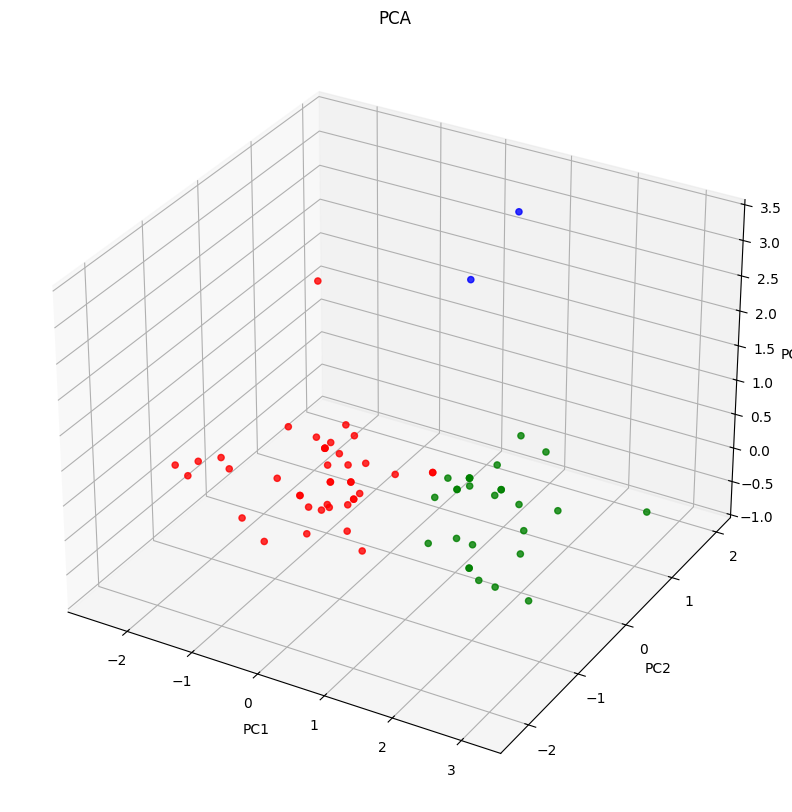

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],alpha=0.8,c=df2.cluster.map({0:'r',1:'g',2:'b'}))
ax.set_title('PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()